<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/blob/main/customer_segmentation_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#!pip install pandas

In [30]:
#!pip install scikit-learn

In [31]:
#!pip install matplotlib

In [32]:
#!pip install seaborn

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, completeness_score, homogeneity_score, v_measure_score, silhouette_score
from scipy.spatial.distance import pdist, squareform

In [34]:
#The dataset
df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Customer-Segmentation-Unsupervised-Learning-/main/Dataset/data.csv')  # from my github repository


# EDA

In [35]:
# Display the first few rows of the dataset
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


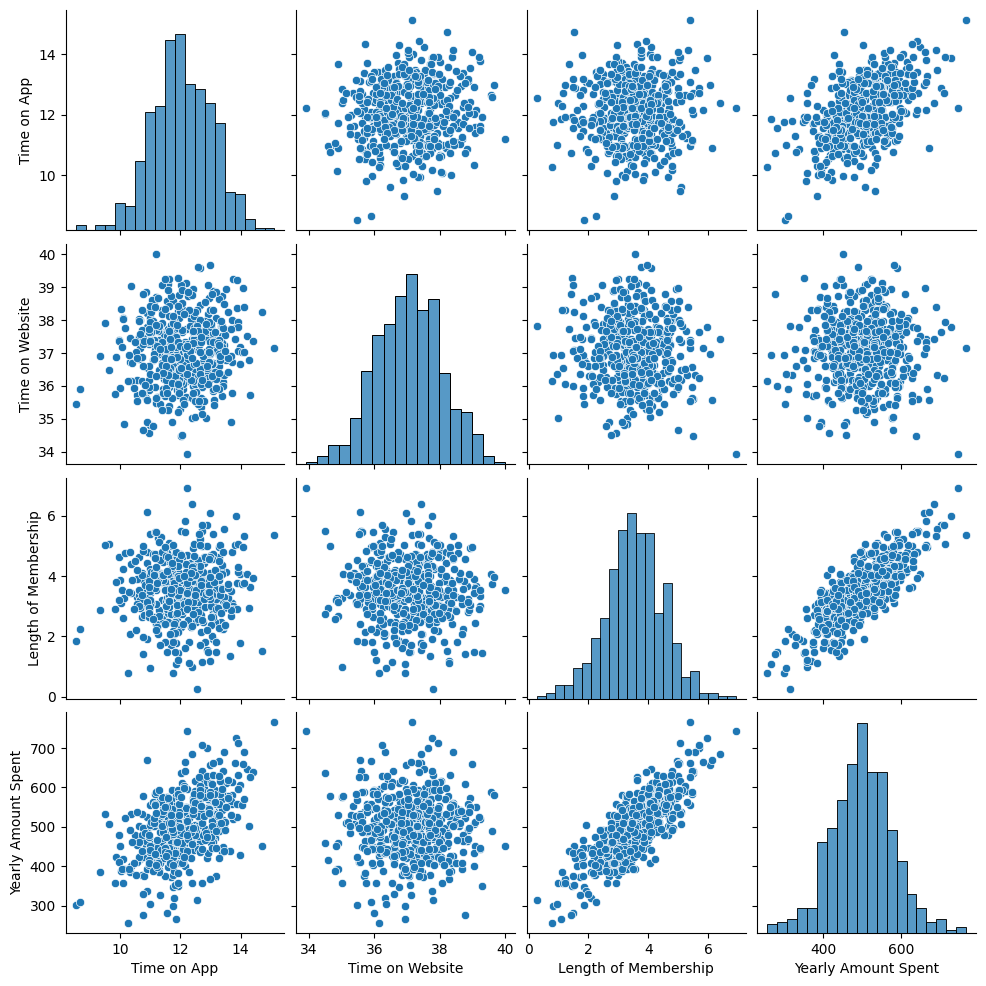

In [36]:
#Exploration and Visualization
sns.pairplot(df)
plt.show()

In [37]:
# Feature selection (for simplicity, excluding non-numeric columns)
X = df[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

In [38]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering

Clustering is a process of grouping similar objects together; i.e., to partition unlabeled examples into disjoint subsets of clusters, such that:

*   Examples within a cluster are similar (in this case, we speak of high intraclass similarity).
*   Examples in different clusters are different (in this case, we speak of low interclass similarity).

Two kinds of inputs can be used for grouping:

1.  in similarity-based clustering, the input to the algorithm is an n × n dissimilarity matrix or distance matrix;
2.   in feature-based clustering, the input to the algorithm is an n × D feature matrix or design matrix, where n is the number of examples in the dataset and D the dimensionality of each sample.

Similarity-based clustering allows easy inclusion of domain-specific similarity, while feature-based clustering has the advantage that it is applicable to potentially noisy data.

# Types of Clustering Techniques

1.   Partitional algorithms

  These start with a random partition and refine it iteratively. Also known as “flat” clustering.
> For example, K-means clustering

---

2.   Hierarchical algorithms

 These organize the data into hierarchical structures, where data can be agglomerated in the bottom-up direction, or split in a top-down manner.

> For example, agglomerative clustering

# **K-Means Clustering**
K-means algorithm is a hard partition algorithm with the goal of assigning each data point to a single cluster.

> The **K-means algorithm**, also known as ***Lloyd’s algorithm***, is an iterative procedure that searches for a solution of the K-means clustering problem and works as follows

First, we need to decide the number of clusters, k. (`n_clusters` is) Then we apply the following procedure:


1.   Initialize (e.g., randomly) the k cluster centers, called **centroids**
2.   Decide the class memberships of the n data samples by assigning them to the nearest-cluster centroids (e.g., the center of gravity or mean).
3.   Re-estimate the k cluster centers, ci, by assuming the memberships found above are correct.
4.   If none of the n objects changes its membership from the last iteration, then exit. Otherwise go to step 2



> Note: ***Centroid***:The centroid is the centre point of the object.





In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
# Calculate pairwise distances
distances = pdist(X_scaled)

In [48]:
# Create a square distance matrix
distance_matrix = squareform(distances)

In [49]:
# Create a DataFrame for the distance matrix
distance_df = pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1200x1000 with 0 Axes>

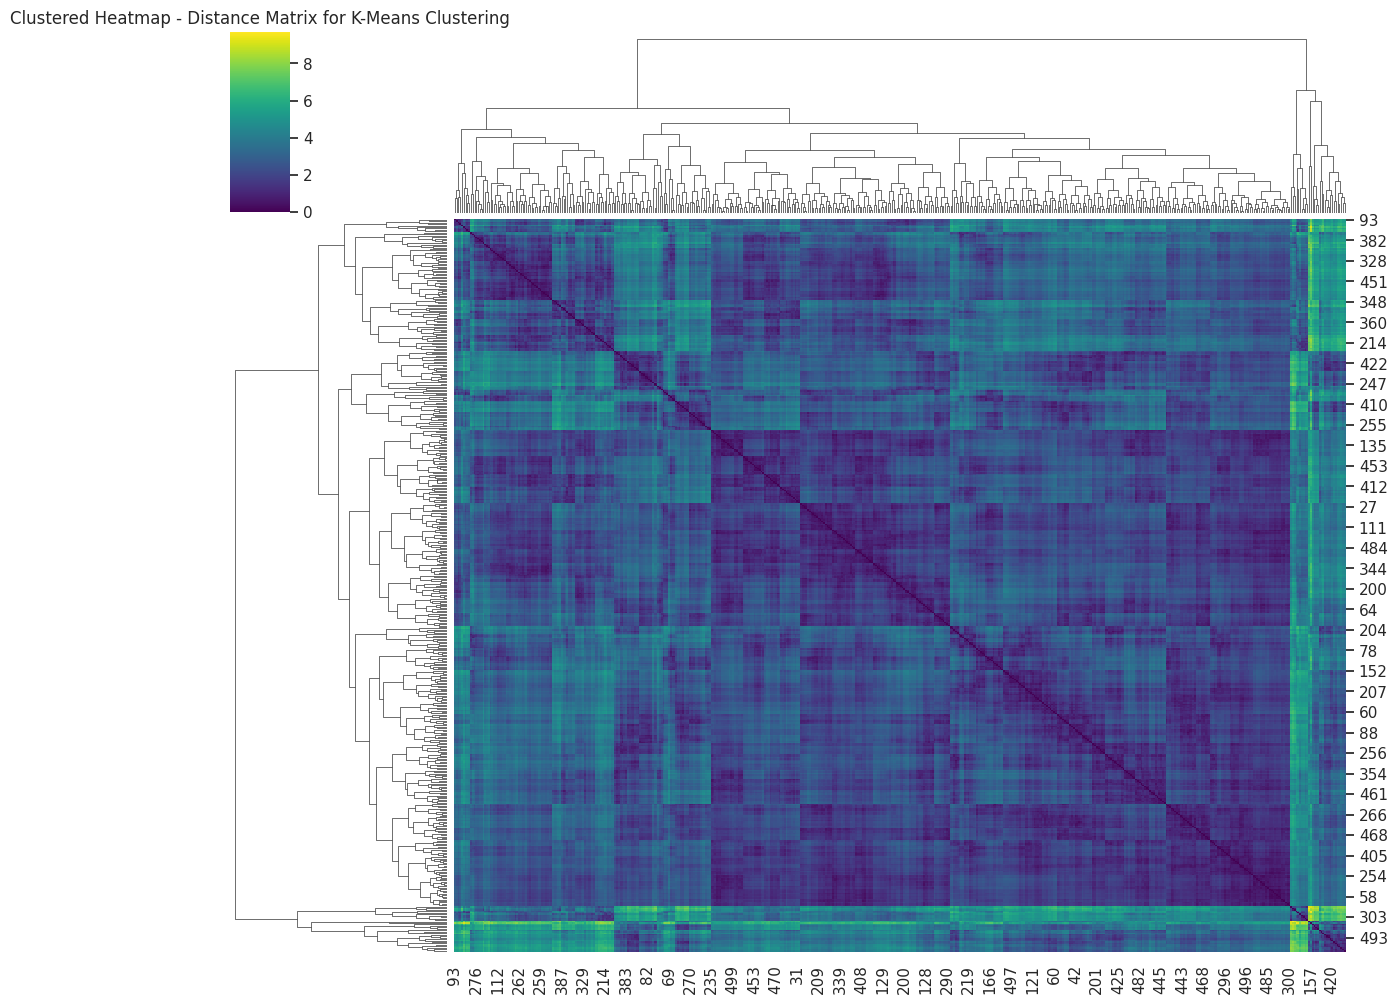

In [50]:
# Create a clustered heatmap
plt.figure(figsize=(12, 10))
sns.clustermap(distance_df, cmap='viridis', method='complete', figsize=(12, 10))

plt.title('Clustered Heatmap - Distance Matrix for K-Means Clustering')
plt.show()

When a KMeans object is created in scikit-learn, it internally performs the following steps during the fitting process:

1.   Initialization of Centroids:

> Randomly initializes the centroids.

```
# Example: Randomly initialize k centroids
k = 3  # Replace with the desired number of clusters
initial_centroids = X.sample(n=k, random_state=42)
```

2.   Assign Data Points to Clusters:
> Iteratively assigns data points to the nearest cluster centroids based on the Euclidean distance.

```
# Example: Assign data points to the nearest centroids
for i in range(k):
    df[f'Distance_to_Center_{i}'] = np.linalg.norm(X - initial_centroids.iloc[i], axis=1)

# Assign each data point to the cluster with the nearest centroid
df['Cluster'] = df[[f'Distance_to_Center_{i}' for i in range(k)]].idxmin(axis=1).apply(lambda x: int(x[-1]))
```

3.   Update Centroids:

> Recalculates the centroids based on the mean of the data points in each cluster.

```
# Example: Re-estimate cluster centers
for i in range(k):
    initial_centroids.iloc[i] = df[df['Cluster'] == i][['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].mean()
```

4.   Check for Convergence:

> Checks whether the algorithm has converged by verifying if any data point changes its cluster assignment. If there are no changes, the algorithm exits; otherwise, it repeats the assignment and update steps

```
# Example: Check for convergence
convergence = (df['Cluster'] == df['Prev_Cluster']).all()
```



In [42]:
# Create a mapping of cluster numbers to new names
cluster_names = {
    0: 'High-Spending, Engaged',
    1: 'Low-Spending, Moderate Engagement',
    2: 'Highest-Spending, Highly Engaged',
    3: 'Moderate-Spending, Moderate Engagement',
    4: 'Moderate-High Spending, Moderate Engagement'
}

In [43]:
df['Cluster'] = df['Cluster'].map(cluster_names)

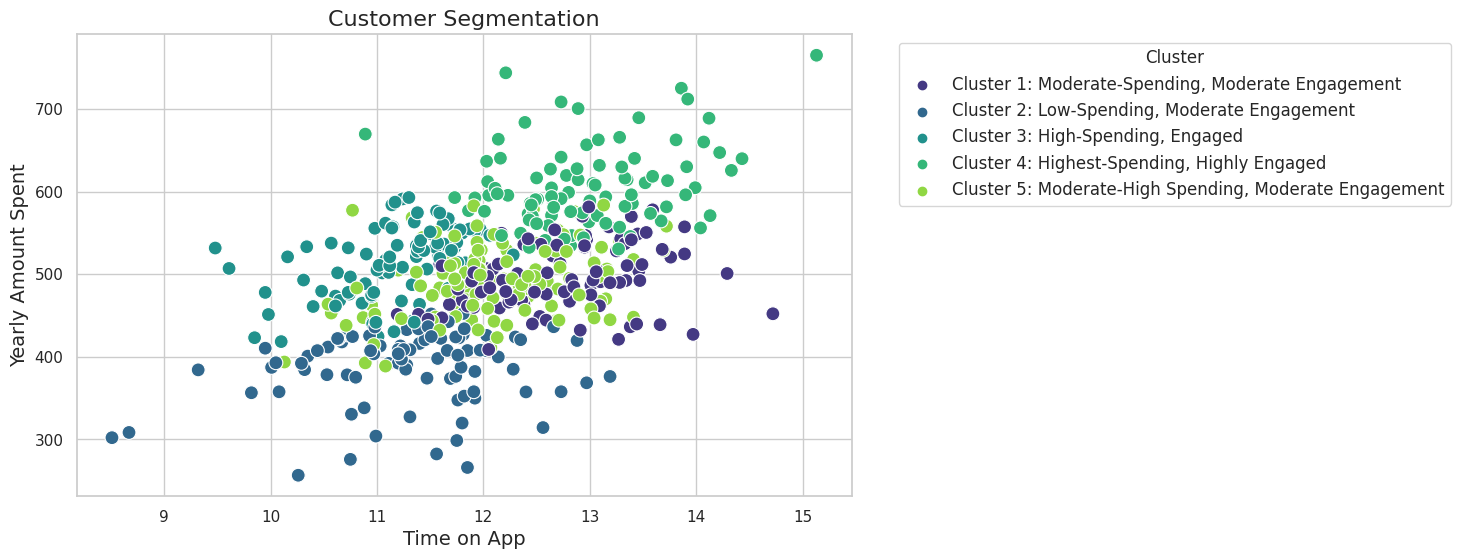

In [44]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Time on App', y='Yearly Amount Spent', hue='Cluster', data=df, palette='viridis', s=100)

# Set plot title and labels
plt.title('Customer Segmentation', fontsize=16)
plt.xlabel('Time on App', fontsize=14)
plt.ylabel('Yearly Amount Spent', fontsize=14)

# Move the legend outside the plot to avoid covering data points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster', fontsize=12)

# Customize the legend labels dynamically based on unique cluster names
legend_labels = [f'Cluster {i+1}: {label}' for i, label in enumerate(df['Cluster'].unique())]
scatter.legend_.set_title('Cluster')
for i, text in enumerate(scatter.legend_.texts):
    text.set_text(legend_labels[i])

# Show the plot
plt.show()

# **Metrics to Measure Clustering Quality (Silhouette Coefficient)**

In [45]:
# Evaluation Metrics
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2248505279793299


This positive score indicates that, on average, the samples are closer to the members of their own cluster than they are to members of the neighboring clusters. A score of 0.22 is moderate but not extremely high. It suggests that there is some separation between clusters, but there might also be some overlap or ambiguity in the clustering.

The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Here's a breakdown of the Silhouette Score:


> 1.   **Near +1:** Indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This is a desirable scenario.
2.   **Near 0:** Indicates that the object is on or very close to the decision boundary between two neighboring clusters.
3.   **Near -1:** Indicates that those samples might have been assigned to the wrong cluster.

In [46]:
df.to_csv('kmeans_clustered_data.csv', index=False)